## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Считывание данных

In [2]:
try:
    data = pd.read_csv('/Users/gorbachevalexander/Desktop/Сборный/Сборный Проект №1/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')    

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На данный момент наблюдаем разные регистры и пропуски в столбцах

## Предобработка

### Приведение названий столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Произвел приведение к snake_case

Для упрощения расчетов привожу year_of_release к типу int

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

### Проверка на дубликаты

In [7]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

### Обработка пустых значений

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски обнаружены в 5 столбцах: name - 2, year_of_release - 269, critic_score - 8578, user_score - 6701, rating - 6766.
Сразу на глаз без дополнительных рассчетов можем удалить два пропуска из столбца name.
Для наглядности расчитал процентное соотношение для пропусков

In [9]:
2 / data.shape[0] * 100

0.011965300628178284

In [10]:
269 / data.shape[0] * 100

1.609332934489979

In [11]:
8578 / data.shape[0] * 100

51.31917439425665

In [12]:
6701 / data.shape[0] * 100

40.08973975471134

In [13]:
6766 / data.shape[0] * 100

40.478612025127134

In [14]:
data = data.dropna(subset=['name'])

### Столбец rating

In [15]:
data['rating'].isna().sum()

6764

In [16]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Рейтинг K-A имеется всего в 3-х строках. Этот рейтинг устаревший и "в 1998 году был переименован в Е – для всех возрастов", поэтому заменим его на E.

In [17]:
data.loc[data['rating'] == 'K-A', 'rating']  = 'E' 

Рейтинг RP абревиатура Raiting Pending, что переводится, как ожидание рейтинга. Значение RP заменим на NaN

In [18]:
data.loc[data['rating'] == 'RP', 'rating']  = np.nan

Рейтинг AO есть только у 1 игры. Описание рейтинга «AO» («Adults Only 18+») — «Только для взрослых». По описанию этот рейтинг очень близок к рейтингу «M» («Mature») — «От 17 лет». Поэтому заменим рейтинг AO на M.

In [19]:
data.loc[data['rating'] == 'AO', 'rating'] = 'M'

In [20]:
data['rating'].value_counts()

E       3993
T       2961
M       1564
E10+    1420
EC         8
Name: rating, dtype: int64

In [21]:
data.loc[data.rating.isna(),'rating']='N/D'

In [22]:
data['rating'].value_counts()

N/D     6767
E       3993
T       2961
M       1564
E10+    1420
EC         8
Name: rating, dtype: int64

### Столбец genre

In [23]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Здесь никаких вопросов по данным не возникло

### Столбец user_score

In [24]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
0.5       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [25]:
data.loc[data['user_score'] == 'tbd'] = np.nan
data[data['user_score'] == 'tbd']['user_score'].sum()

0

In [26]:
data['year_of_release'].value_counts()

2008    1101
2009    1021
2007    1005
2010     924
2011     919
2006     882
2005     818
2003     680
2004     655
2002     637
2012     629
2015     568
2014     560
2013     529
2016     468
2001     400
1998     379
1999     330
2000     307
1997     288
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

Очевидные пропуски имеются в Year_of_Release - 269 пропусков, отсутствие данных очевидно является ошибкой заведения данных.
Значения были проверены выше, выбросов нет.
Исходя из кол-ва можно было бы удалить, но я не стал. 

In [27]:
data[data.user_score=='tbd'].year_of_release.value_counts()

Series([], Name: year_of_release, dtype: Int64)

существенная часть значений в колонке user_score представлена значением 'tbd', что можно перевести как оценка ожидается, для целей статистики логично данные значения перевести в NaN, т.к. такое значение имеется в т.ч. по достаточно "старым" релизам игр.

In [28]:
data.loc[data.user_score=='tbd','user_score']=np.nan
data['user_score']=data['user_score'].astype(float)

### Создание столбца sales

In [29]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14289 non-null  object 
 1   platform         14289 non-null  object 
 2   year_of_release  14068 non-null  Int64  
 3   genre            14289 non-null  object 
 4   na_sales         14289 non-null  float64
 5   eu_sales         14289 non-null  float64
 6   jp_sales         14289 non-null  float64
 7   other_sales      14289 non-null  float64
 8   critic_score     7055 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           14289 non-null  object 
 11  sales            14289 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [31]:
data.sales.value_counts()

0.02     867
0.03     662
0.01     657
0.04     520
0.05     510
        ... 
3.84       1
11.90      1
8.79       1
0.52       1
6.32       1
Name: sales, Length: 1000, dtype: int64

## Исследовательский анализ

### Выпуск игр по годам

In [32]:
data.name.value_counts()

Need for Speed: Most Wanted                      12
Madden NFL 07                                     9
FIFA 14                                           9
LEGO Marvel Super Heroes                          9
Angry Birds Star Wars                             8
                                                 ..
Lara Croft Tomb Raider: The Angel of Darkness     1
Lord of Darkness                                  1
Mortal Kombat: Special Forces                     1
Harvest Moon: Tree of Tranquility                 1
Xenosaga I·II                                     1
Name: name, Length: 10200, dtype: int64

In [33]:
data.name.head(10)

0                   Wii Sports
1            Super Mario Bros.
2               Mario Kart Wii
3            Wii Sports Resort
4     Pokemon Red/Pokemon Blue
5                       Tetris
6        New Super Mario Bros.
7                     Wii Play
8    New Super Mario Bros. Wii
9                    Duck Hunt
Name: name, dtype: object

In [34]:
game_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
game_year.index = game_year.index.astype('int')

<AxesSubplot:xlabel='year_of_release'>

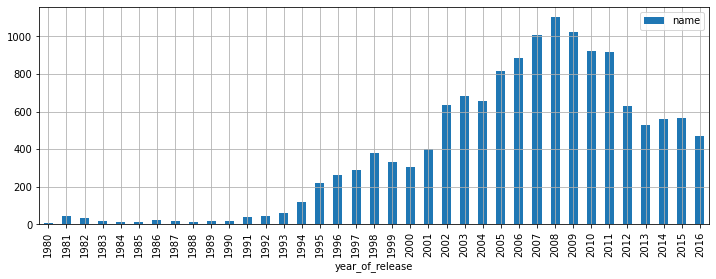

In [35]:
game_year.plot(kind='bar', figsize=(12,4), grid=True)

Из диаграммы видно, что первый пик 379 выпущенных игр пришёлся на 1998 год, второй пик 1101 игра пришёлся на 2008 год. С 2008 по 2013 год было падение выпускаемых игр в 2 раза, с 1101 игры до 529. Начиная с 2013 года, количество выпускаемых игр стабилизировалось на значении около 500 в год.

### Продажи по годам

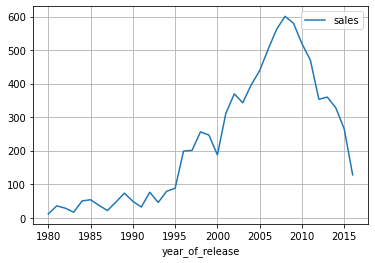

In [36]:
data.pivot_table(index='year_of_release', values='sales', aggfunc='sum').plot(grid=True);

На графике продаж, также можно увидеть 2 пика в 1998 и в 2008 году. После 2008 года происходит падение продаж с 600 млн копий в 2008 году до 150 млн в 2016 году.

### Продажи по платформам
Построение таблицы платформы - продажи (количество копий) с сортировкой продаж по убыванию.

In [37]:
platform_games = data.pivot_table(index='platform', values='sales', aggfunc='sum').reset_index().sort_values(by='sales', ascending=False).reset_index()
platform_games.columns = ['index', 'platform', 'sales']
display(platform_games.head())

,index,platform,sales
0,16,PS2,1191.93
1,28,X360,958.84
2,17,PS3,929.40
3,26,Wii,807.14
4,15,PS,717.24


Возьмём 15 самых популярных платформ. Построим распределение продаж по годам для этих платформ, чтобы определить характерный срок появления и исчезновения игровых платформ.

### Топ 15 платформ по годам

In [38]:
platform_top15 = platform_games.loc[:14, 'platform']
platform_top15.tolist

<bound method IndexOpsMixin.tolist of 0      PS2
1     X360
2      PS3
3      Wii
4       PS
5       DS
6      PS4
7      PSP
8      GBA
9       PC
10      GB
11     3DS
12     NES
13      XB
14     N64
Name: platform, dtype: object>

In [39]:
data_platf_top15 = data.query('platform in @platform_top15')
data_platf_top15['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4',
       '3DS', 'N64', 'PS', 'XB', 'PC', 'PSP'], dtype=object)

In [40]:
data_platf_top15 = data_platf_top15.dropna(subset=['year_of_release'])

In [41]:
platform_year = data_platf_top15.pivot_table(index='platform', columns='year_of_release', values='sales', aggfunc='sum')
platform_year.head()

year_of_release,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,60.53,51.01,56.32,43.07,27.21,15.1
DS,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,121.23,102.44,84.54,61.56,13.48,10.28,0.97,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,1.43,64.97,4.89,5.57,25.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для выяснения характерного срока за которые появляются новые платформы и исчезают старые, построим таблицу платформа - срок существования платформы (год появление платформы, год прекращения продаж по ней). Таблицу будем создавать вручную просматривая графики продаж платформ топ 15.
Создание датафрейма со столбцами platform - название платформы, start - год выхода платформы на рынок, end - дата окончания продаж платформы.

In [42]:
platf_top15_start_end = pd.DataFrame(columns=['platform', 'start', 'end'])

## Просмотр продаж топ 15 платформ по отдельности для определения годов их существования.

### Для PS2, X360, PS3, Wii, DS

<AxesSubplot:xlabel='year_of_release'>

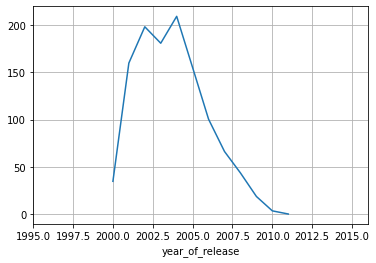

In [43]:
platform_year.loc['PS2'].plot(xlim=(1995, 2016), grid=True)

Для платформы PS2 срок существования 2000 - 2011

In [44]:
platf_top15_start_end = platf_top15_start_end.append({'platform' : 'PS2','start' : 2000,'end' : 2011},ignore_index=True)

<AxesSubplot:xlabel='year_of_release'>

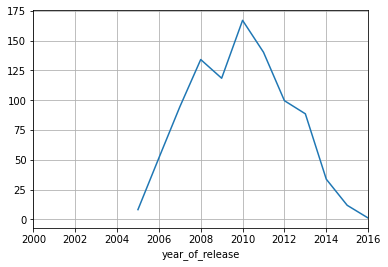

In [45]:
platform_year.loc['X360'].plot(xlim=(2000, 2016), grid=True)

Для платформы X360 срок существования 2005 - 2016

In [46]:
platf_top15_start_end = platf_top15_start_end.append({'platform' : 'X360','start' : 2005,'end' : 2016},ignore_index=True)

<AxesSubplot:xlabel='year_of_release'>

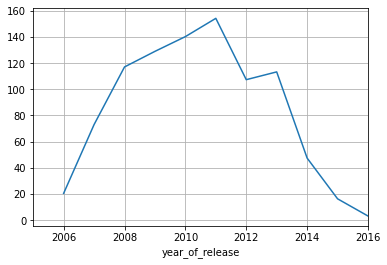

In [47]:
platform_year.loc['PS3'].plot(xlim=(2005, 2016), grid=True)

Для платформы PS3 срок существования 2006 - 2016

In [48]:
platf_top15_start_end = platf_top15_start_end.append({'platform' : 'PS3','start' : 2006,'end' : 2016},ignore_index=True)

<AxesSubplot:xlabel='year_of_release'>

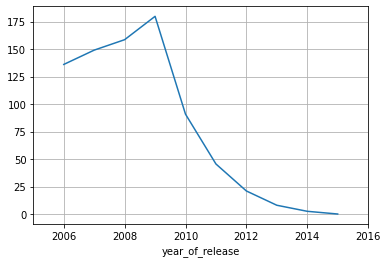

In [49]:
platform_year.loc['Wii'].plot(xlim=(2005, 2016), grid=True)

Для платформы Wii срок существования 2006 - 2015

In [50]:
platf_top15_start_end = platf_top15_start_end.append({'platform' : 'Wii','start' : 2006,'end' : 2015},ignore_index=True)

<AxesSubplot:xlabel='year_of_release'>

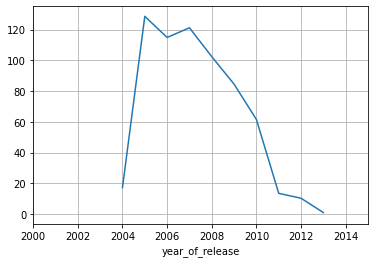

In [51]:
platform_year.loc['DS'].plot(xlim=(2000, 2015), grid=True)

Для платформы DS срок существования 2004 - 2013.

In [52]:
platf_top15_start_end = platf_top15_start_end.append({'platform' : 'DS','start' : 2004,'end' : 2013},ignore_index=True)

<AxesSubplot:xlabel='year_of_release'>

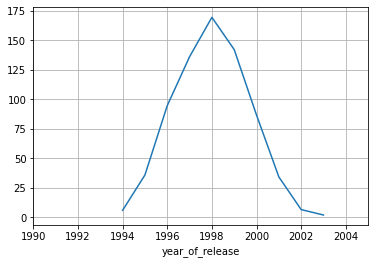

In [53]:
platform_year.loc['PS'].plot(xlim=(1990, 2005), grid=True)

Для платформы PS срок существования 1994 - 2003.

In [54]:
platf_top15_start_end = platf_top15_start_end.append(
                        {'platform' : 'PS',
                         'start' : 1994,
                         'end' : 2003},
                        ignore_index=True
)

<AxesSubplot:xlabel='year_of_release'>

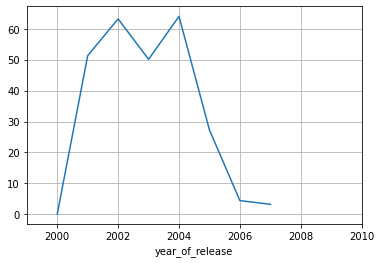

In [55]:
platform_year.loc['GBA'].plot(xlim=(1999, 2010), grid=True)

Для платформы GBA срок существования 2000 - 2007.

In [56]:
platf_top15_start_end = platf_top15_start_end.append(
                        {'platform' : 'GBA',
                         'start' : 2000,
                         'end' : 2007},
                        ignore_index=True
)

<AxesSubplot:xlabel='year_of_release'>

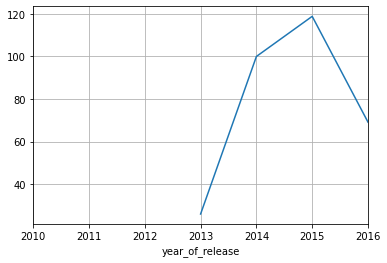

In [57]:
platform_year.loc['PS4'].plot(xlim=(2010, 2016), grid=True)

Для платформы PS4 срок существования 2013 - 2016.

In [58]:
platf_top15_start_end = platf_top15_start_end.append(
                        {'platform' : 'PS4',
                         'start' : 2013,
                         'end' : 2016},
                        ignore_index=True
)

<AxesSubplot:xlabel='year_of_release'>

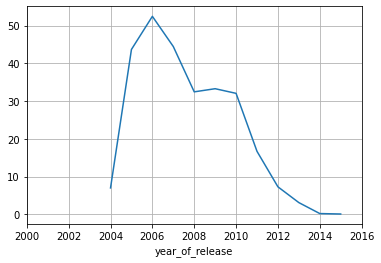

In [59]:
platform_year.loc['PSP'].plot(xlim=(2000, 2016), grid=True)

Для платформы PSP срок существования 2004 - 2015.

In [60]:
platf_top15_start_end = platf_top15_start_end.append(
                        {'platform' : 'PSP',
                         'start' : 2004,
                         'end' : 2015},
                        ignore_index=True
)

<AxesSubplot:xlabel='year_of_release'>

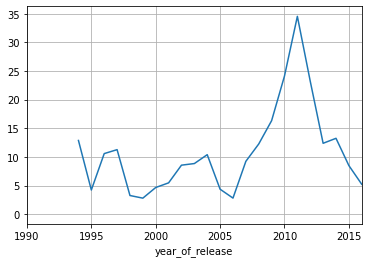

In [61]:
platform_year.loc['PC'].plot(xlim=(1990, 2016), grid=True)

Для платформы PC срок существования 1994 - 2016.

In [62]:
platf_top15_start_end = platf_top15_start_end.append(
                        {'platform' : 'PC',
                         'start' : 1994,
                         'end' : 2016},
                        ignore_index=True
)

<AxesSubplot:xlabel='year_of_release'>

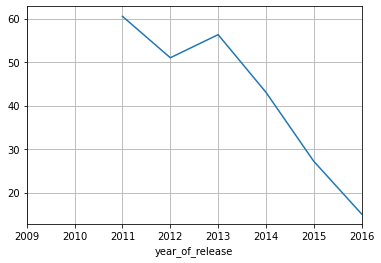

In [63]:
platform_year.loc['3DS'].plot(xlim=(2009, 2016), grid=True)

Для платформы 3DS срок существования 2011 - 2016.

In [64]:
platf_top15_start_end = platf_top15_start_end.append(
                        {'platform' : '3DS',
                         'start' : 2011,
                         'end' : 2016},
                        ignore_index=True
)

<AxesSubplot:xlabel='year_of_release'>

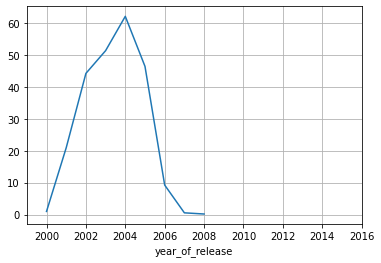

In [65]:
platform_year.loc['XB'].plot(xlim=(1999, 2016), grid=True)

Для платформы XB срок существования 2000 - 2008.

In [66]:
platf_top15_start_end = platf_top15_start_end.append(
                        {'platform' : 'XB',
                         'start' : 2000,
                         'end' : 2008},
                        ignore_index=True
)

<AxesSubplot:xlabel='year_of_release'>

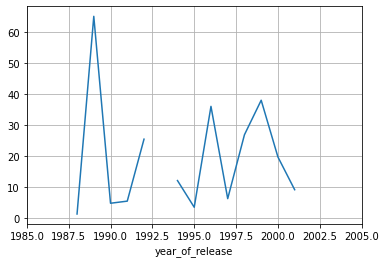

In [67]:
platform_year.loc['GB'].plot(xlim=(1985, 2005), grid=True)

Для платформы GB срок существования 1998 - 2001.

In [68]:
platf_top15_start_end = platf_top15_start_end.append(
                        {'platform' : 'GB',
                         'start' : 1988,
                         'end' : 2001},
                        ignore_index=True
)

<AxesSubplot:xlabel='year_of_release'>

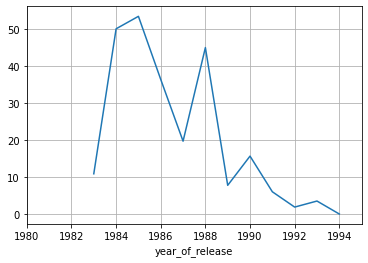

In [69]:
platform_year.loc['NES'].plot(xlim=(1980, 1995), grid=True)

Для платформы NES срок существования 1983 - 1994.

In [70]:
platf_top15_start_end = platf_top15_start_end.append(
                        {'platform' : 'NES',
                         'start' : 1983,
                         'end' : 1994},
                        ignore_index=True
)

<AxesSubplot:xlabel='year_of_release'>

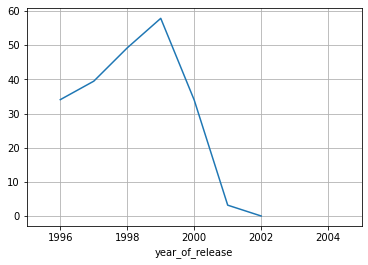

In [71]:
platform_year.loc['N64'].plot(xlim=(1995, 2005), grid=True)

Для платформы N64 срок существования 1996 - 2002.

In [72]:
platf_top15_start_end = platf_top15_start_end.append(
                        {'platform' : 'N64',
                         'start' : 1996,
                         'end' : 2002},
                        ignore_index=True
)

In [73]:
display(platf_top15_start_end)

,platform,start,end
0,PS2,2000,2011
1,X360,2005,2016
2,PS3,2006,2016
3,Wii,2006,2015
4,DS,2004,2013
5,PS,1994,2003
6,GBA,2000,2007
7,PS4,2013,2016
8,PSP,2004,2015
9,PC,1994,2016


#### Расчёт средней длительности существования платформ

In [74]:
platf_top15_start_end['existence'] = platf_top15_start_end['end'] - platf_top15_start_end['start']

Расчёт среднего времени существования платформ.

In [75]:
platf_top15_start_end['existence'].mean()

9.666666666666666

Среднее время существования платформы 10 лет.

### Платформы существующие в текущий период и их динамика

Создание датафрейма игр существующих в период 5 лет (актуальность) до 2016 года, с целью отбора актуальных платформ в 2016 году.

In [76]:
data_actual = data.query('year_of_release > 2011', engine='python')
data_actual.loc[:, ['year_of_release']] = data_actual.loc[:, ['year_of_release']].astype(int)
platforms_actual_sales = data_actual.pivot_table(index='platform', columns='year_of_release', values='sales', aggfunc='sum')
display(platforms_actual_sales)

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.01,56.32,43.07,27.21,15.10
DS,10.28,0.97,NaN,NaN,NaN
PC,23.22,12.38,13.25,8.49,5.22
PS3,107.29,113.24,47.40,16.30,3.16
PS4,NaN,25.99,100.00,118.86,69.15
PSP,7.32,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,5.95,4.24
Wii,21.08,8.11,2.61,0.15,NaN
WiiU,17.56,21.65,22.01,16.27,4.30


In [77]:
platforms_actual_2016_sales = platforms_actual_sales[platforms_actual_sales[2016] > 0]
display(platforms_actual_2016_sales)

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.01,56.32,43.07,27.21,15.10
PC,23.22,12.38,13.25,8.49,5.22
PS3,107.29,113.24,47.40,16.30,3.16
PS4,NaN,25.99,100.00,118.86,69.15
PSV,16.19,10.59,11.90,5.95,4.24
WiiU,17.56,21.65,22.01,16.27,4.30
X360,99.57,88.57,33.77,11.87,1.22
XOne,NaN,18.96,54.07,59.92,25.82


In [78]:
platforms_actual_2016 = platforms_actual_2016_sales.index
display(platforms_actual_2016)

Index(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'WiiU', 'X360', 'XOne'], dtype='object', name='platform')

Из полученной таблицы видно, что в 2016 году лидируют по продажам 3 платформы PS4, XOne и 3DS . Каждая платформа имеет более 15 млн проданных копий. Посчитаем их долю в продажах.

In [79]:
round(100 * (platforms_actual_2016_sales.loc[platforms_actual_2016_sales[2016]> 15][2016]).sum() / 
             platforms_actual_2016_sales[[2016]].sum(), 1)

year_of_release
2016    85.9
dtype: float64

Доля в продажах этих 3-х платформ составляет 85,9 %. Таким образом, три платформы 3DS, PS4 и XOne являются самыми прибыльными.

In [80]:
platforms_actual_top = platforms_actual_2016_sales[platforms_actual_2016_sales[2016] > 15]
display(platforms_actual_top)

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.01,56.32,43.07,27.21,15.10
PS4,NaN,25.99,100.00,118.86,69.15
XOne,NaN,18.96,54.07,59.92,25.82


Создание списка лидирующих платформ.

In [81]:
platforms_2016_top = platforms_actual_top.index
platforms_2016_top

Index(['3DS', 'PS4', 'XOne'], dtype='object', name='platform')

### Статистический анализ продаж 3-х ведущих платформ 3DS, PS4 и XOne

Создание датафрейма с играми 3-х платформ 3DS, PS4, XOne.

In [82]:
data_platforms_2016_top = data_actual.query('platform in @platforms_2016_top')
display(data_platforms_2016_top.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,N/D,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,N/D,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,N/D,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


Построение 'ящиков с усами' по продажам этих 3-х ведущих платформ. 

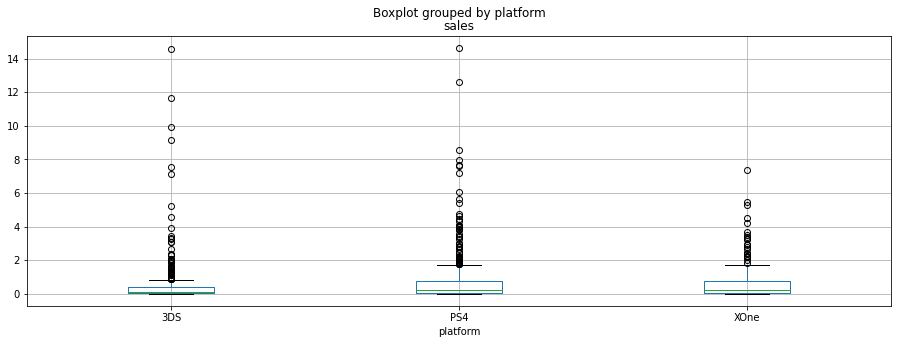

In [83]:
data_platforms_2016_top.boxplot('sales', by='platform', figsize=(15, 5));

(0.0, 2.0)

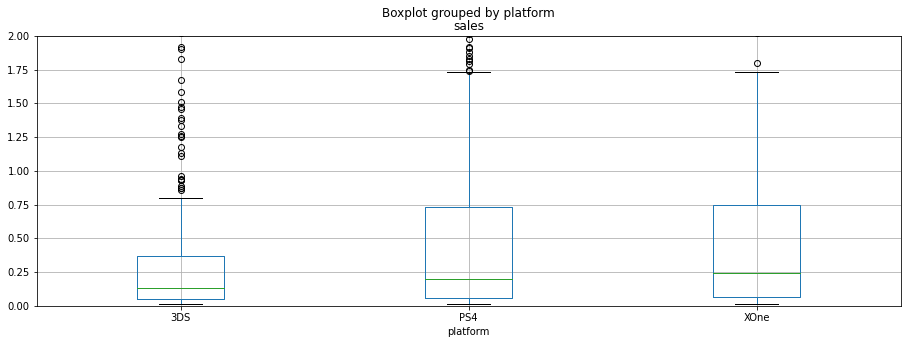

In [84]:
data_platforms_2016_top.boxplot('sales', by='platform', figsize=(15, 5));
plt.ylim(0,2)

In [85]:
ps4 = data_platforms_2016_top.query('platform == "PS4"')['sales'].describe()

In [86]:
three_ds = data_platforms_2016_top.query('platform == "3DS"')['sales'].describe()

In [87]:
xone = data_platforms_2016_top.query('platform == "XOne"')['sales'].describe()

In [88]:
platf_top3_stat = pd.DataFrame(
                                index=ps4.index, 
                                data={
                                   'ps4' : ps4.values, 
                                   '3ds' : three_ds.values,
                                   'xone' : xone.values
                               }
)
platf_top3_stat['ps4'] = round(platf_top3_stat['ps4'], 2)
platf_top3_stat['3ds'] = round(platf_top3_stat['3ds'], 2)
platf_top3_stat['xone'] = round(platf_top3_stat['xone'], 2)
display(platf_top3_stat)

,ps4,3ds,xone
count,386.00,367.00,236.00
mean,0.81,0.53,0.67
std,1.62,1.44,1.05
min,0.01,0.01,0.01
25%,0.06,0.05,0.07
50%,0.20,0.13,0.24
75%,0.73,0.37,0.75
max,14.63,14.60,7.39


Из графиков "ящик с усами" и таблицы статистики 3-х платформ ps4, 3ds и xone можно увидеть, что больше всего игр (464) выпустила платформа 3ds, меньше всего 236 игр платформа xone. Среднее значение продаж самое высокое у платформы ps4 - 810 тыс копий, минимальное среднее значение продаж у платформы 3ds - 550 тыс копий. Минимальное значение медианы 0.14 имеет платформа 3ds, что означает, что у этой платформы много игр с малым значением продаж, меньше 140 тыс.

### Влияние отзывов пользователей и критиков на продажи популярных современных платформ

Создание датафрейма с удалением пустых значений в столбцах 'user_score', 'critic_score'. Преобразование типа данных столца 'user_score' с object на float.

In [89]:
data_without_nan = data_actual.dropna(subset=['user_score', 'critic_score'])
data_without_nan = data_without_nan.query('user_score != "tbd"')
data_without_nan['user_score'] = data_without_nan['user_score'].astype('float')
data_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1297 non-null   object 
 1   platform         1297 non-null   object 
 2   year_of_release  1297 non-null   int64  
 3   genre            1297 non-null   object 
 4   na_sales         1297 non-null   float64
 5   eu_sales         1297 non-null   float64
 6   jp_sales         1297 non-null   float64
 7   other_sales      1297 non-null   float64
 8   critic_score     1297 non-null   float64
 9   user_score       1297 non-null   float64
 10  rating           1297 non-null   object 
 11  sales            1297 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 131.7+ KB


#### PS4 самая популярная современная платформа

Создание датафрейма платформы ps4.

In [90]:
ps4 = data_without_nan.query('platform == "PS4"')

Построение диаграммы рассеяния продаж и оценок пользователей платформы PS4.

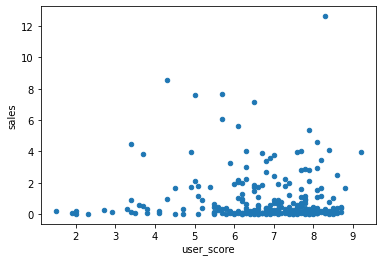

In [91]:
ps4.plot(x='user_score', y='sales', kind='scatter');

Расчёт коэффициента корреляции Пирсона между продажами и оценкой пользователей.

In [92]:
ps4['sales'].corr(ps4['user_score'])

-0.03362497596528878

Из диаграммы рассеяния и коэффициента Пирсона равного -0,03, можно сделать вывод, что зависимости продаж платформы PS3 от оценок пользователей не имеется.

Построение диаграммы рассеяния продаж по оценке критиков для платформы PS4.

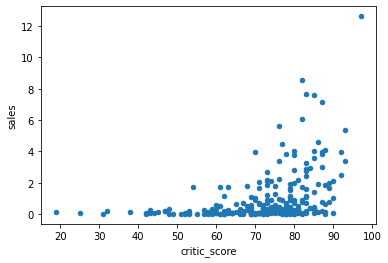

In [93]:
ps4.plot(x='critic_score', y='sales', kind='scatter');

In [94]:
ps4['sales'].corr(ps4['critic_score'])

0.40589480145836687

Из диаграммы рассеяния и коэффициента корреляции Пирсона равному 0,4 видно, что незначительная зависимость продаж платформы PS4 от оценок критиков есть.

Вывод для платформы PS4, продажи игр не коррелирует с оценками пользователей, и незначительно коррелирует с оценками критиков.

#### XOne

Создание датафрейма платформы xone.

In [95]:
xone_ds = data_without_nan.query('platform == "XOne"')

Диаграмма рассеяния оценка пользователей, продажи.

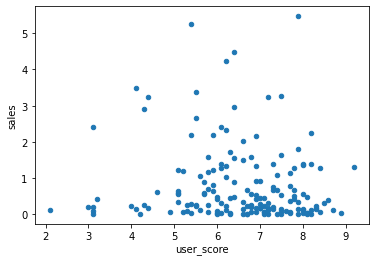

In [96]:
xone_ds.plot(x='user_score', y='sales', kind='scatter');

Расчет коэффициента корреляции Пирсона оценка пользователей, продажи.

In [97]:
xone_ds['sales'].corr(xone_ds['user_score'])

-0.09400318326920852

Из диаграммы рассеяния и коэффициента Пирсона равного -0,09, можно сделать вывод, что зависимости продаж платформы XOne от оценок пользователей не имеется.

Диаграмма рассеяния оценка критиков, продажи.

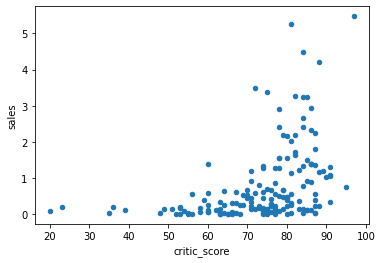

In [98]:
xone_ds.plot(x='critic_score', y='sales', kind='scatter');

Расчёт коэффициента корреляции Пирсона оценка критиков, продажи.

In [99]:
xone_ds['sales'].corr(xone_ds['critic_score'])

0.4104220356129637

Из диаграммы рассеяния и коэффициента корреляции Пирсона равному 0,4 видно, что незначительная зависимость продаж платформы XOne от оценок критиков есть.

Вывод для платформы XOne, продажи игр не коррелирует с оценками пользователей, и незначительно коррелирует с оценками критиков.

#### 3DS

In [100]:
three_ds = data_without_nan.query('platform == "3DS"')

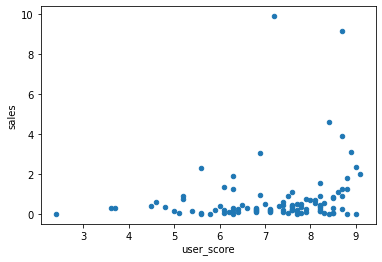

In [101]:
three_ds.plot(x='user_score', y='sales', kind='scatter');

In [102]:
three_ds['sales'].corr(three_ds['user_score'])

0.2018125500765528

Из диаграммы рассеяния и коэффициента Пирсона равного 0.2, можно сделать вывод, что очень незначительная зависимость продаж платформы 3DS от оценок пользователей имеется.

In [103]:
three_ds['sales'].corr(three_ds['critic_score'])

0.31055301915326294

Из диаграммы рассеяния и коэффициента корреляции Пирсона равному 0,31 видно, что незначительная зависимость продаж платформы 3DS от оценок критиков есть.

Вывод для платформы 3DS, продажи игр очень незначительно коррелирует с оценками пользователей, и незначительно коррелирует с оценками критиков.

### Распределение игр по жанрам за все годы

Создание таблицы жанр игр, среднее значение продаж жанра.

In [104]:
genre_sales = data_actual.pivot_table(index='genre', values='sales', aggfunc='mean').sort_values(by='sales', ascending=False)
display(genre_sales)

,sales
genre,
Shooter,1.335263
Platform,0.771667
Sports,0.722610
Role-Playing,0.521081
Racing,0.475446
Misc,0.473988
Simulation,0.467027
Action,0.444598
Fighting,0.418585


Построение столбцовой диаграммы жанр игр, среднее значение продаж жанра.

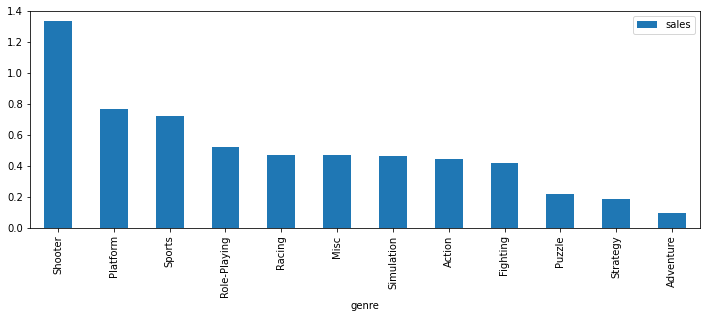

In [105]:
genre_sales.plot(kind='bar', figsize=(12,4));

Из построенного распределения средних продаж игр по жанрам, можно выделить 2 самых популярных жанра - это Platform (платформеры) и shooter (Стрелялка, англ. shooter — «стрелок»).

Платформеры - это жанр видеоигр и поджанр экшн-игр, в которых основной целью является перемещение персонажа игрока между точками в визуализированной среде. 

Также можно выделить 2 малопопулярных жанра - это Strategy (Стратегии) и Adventure (Приключение)

### Распределение игр по жанрам за актуальный период

Построение таблицы жанр, среднее значение продаж жанра за актуалный период.

In [106]:
genre_sales_actual = data_actual.pivot_table(index='genre', values='sales', aggfunc='mean').sort_values(by='sales', ascending=False)
display(genre_sales_actual)

,sales
genre,
Shooter,1.335263
Platform,0.771667
Sports,0.722610
Role-Playing,0.521081
Racing,0.475446
Misc,0.473988
Simulation,0.467027
Action,0.444598
Fighting,0.418585


Столбчатая диаграмма жанр, среднее значение продаж жанра за актуальные период.

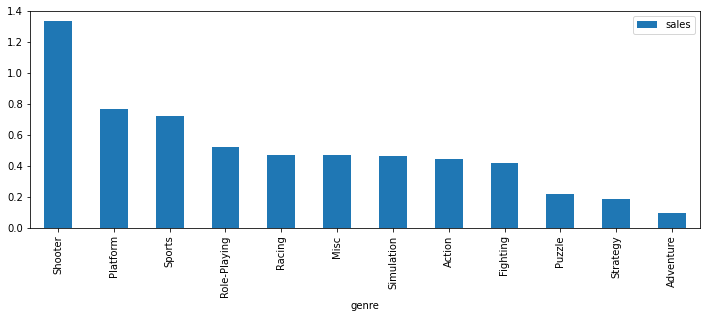

In [107]:
genre_sales_actual.plot(kind='bar', figsize=(12,4));

Из построенного распределения средних продаж игр по жанрам для актуального периода, можно выделить 2 самых популярных жанра - это Shooter и Platform.

Также можно выделить 2 малопопулярных жанра - это Strategy (Стратегии) и Adventure (Приключение)

In [108]:
genre_sales_actual_sum = data_actual.pivot_table(index='genre', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False)
display(genre_sales_actual)

,sales
genre,
Shooter,1.335263
Platform,0.771667
Sports,0.722610
Role-Playing,0.521081
Racing,0.475446
Misc,0.473988
Simulation,0.467027
Action,0.444598
Fighting,0.418585


Столбчатая диаграмма жанр, суммарное значение продаж жанра за актуальные период.

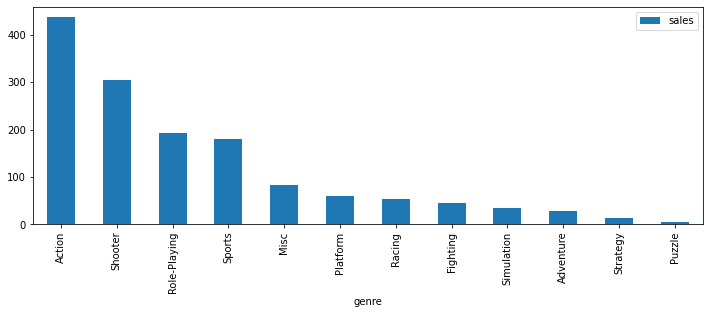

In [109]:
genre_sales_actual_sum.plot(kind='bar', figsize=(12,4));

Лидеры рейтинга экшен и шутер, стратегии и пазлы в аутсайдерах

Распределение кол-ва игр по жанрам

In [110]:
gen_actual = data_actual.pivot_table(index='genre', values='sales', aggfunc='count').sort_values(by='sales', ascending=False)
display(gen_actual)

,sales
genre,
Action,983
Role-Playing,370
Adventure,289
Sports,249
Shooter,228
Misc,173
Racing,112
Fighting,106
Platform,78


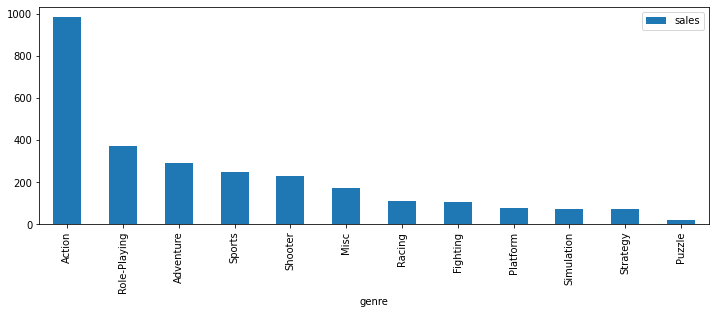

In [111]:
gen_actual.plot(kind='bar', figsize=(12,4));

Наблюдаем в лидерах экшен и ролевые,  в аутсайдерах стратегии и пазлы. 

## Профиль продаж каждого региона

### TOP5 платформ в различных регионах продаж

####  NA Северная америка

Построение таблицы платформы, объём продаж для NA (Северная Америка).

In [112]:
na_platf_top = data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum' ).sort_values(by='na_sales', ascending=False).reset_index()
display(na_platf_top)

,platform,na_sales
0,X360,139.16
1,PS4,108.62
2,PS3,103.10
3,XOne,92.77
4,3DS,54.65
5,WiiU,37.90
6,PC,19.12
7,Wii,16.06
8,PSV,10.97
9,DS,4.35


Расчёт доли платформ в продажах и отбор 5-ти самых популярных в NA.

In [113]:
# создание столбца na_ratio доли платформы в продажах
na_platf_top['na_ratio'] = round(100 * na_platf_top['na_sales'] / na_platf_top['na_sales'].sum(), 1)
# отбор 5-ти самых популярных платформ в NA
na_platf_top5 = na_platf_top.loc[0:4]
display(na_platf_top5)

,platform,na_sales,na_ratio
0,X360,139.16,23.7
1,PS4,108.62,18.5
2,PS3,103.10,17.6
3,XOne,92.77,15.8
4,3DS,54.65,9.3


Таким образом, определены TOP5 платформ в регионе NA и их доли в продажах. Доли платформ в продажах отличаются незначительно всего на 1-5%.

#### EU Европа

Построение таблицы платформы, объём продаж для региона EU (Европа).

In [114]:
eu_platf_top = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum' ).sort_values(by='eu_sales', ascending=False).reset_index()
display(eu_platf_top)

,platform,eu_sales
0,PS4,141.09
1,PS3,106.26
2,X360,74.02
3,XOne,51.43
4,3DS,41.64
5,PC,37.67
6,WiiU,24.97
7,PSV,11.21
8,Wii,10.21
9,DS,2.58


Расчёт доли платформ в продажах и отбор 5 самых популярных платформ в EU.

In [115]:
# создание столбца ratio доля платформы в продажах
eu_platf_top['ratio'] = round(100 * (eu_platf_top['eu_sales'] / eu_platf_top['eu_sales'].sum()), 1)
# отбор 5 самых популярных платформ в EU
eu_platf_top5 = eu_platf_top.loc[0:4]
display(eu_platf_top5)

,platform,eu_sales,ratio
0,PS4,141.09,28.1
1,PS3,106.26,21.2
2,X360,74.02,14.8
3,XOne,51.43,10.3
4,3DS,41.64,8.3


В результате были получены TOP5 платформ в регионе EU (Европа) и их доли в продажах. Доли в продажах отличаются незначительно всего на 4.5 - 6.9 %.

#### JP Япония

Построение таблицы платформы, объём продаж для региона JP (Япония)

In [116]:
jp_platf_top = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum' ).sort_values(by='jp_sales', ascending=False).reset_index()
display(jp_platf_top)

,platform,jp_sales
0,3DS,87.68
1,PS3,34.92
2,PSV,20.93
3,PS4,15.96
4,WiiU,13.01
5,PSP,10.29
6,DS,3.72
7,Wii,3.33
8,X360,1.56
9,XOne,0.34


In [117]:
# добавление столбца jp_ratio доля платформы в продажах
jp_platf_top['jp_ratio'] = round(100 * (jp_platf_top['jp_sales'] / jp_platf_top['jp_sales'].sum()), 1)
# отбор 5 самых популярных платформ
jp_platf_top5 = jp_platf_top.loc[0:4]
display(jp_platf_top5)

,platform,jp_sales,jp_ratio
0,3DS,87.68,45.7
1,PS3,34.92,18.2
2,PSV,20.93,10.9
3,PS4,15.96,8.3
4,WiiU,13.01,6.8


В результате получены TOP5 платформ в регионе JP (Япония) и их доли в продажах. Различия в долях продаж очень значительные.

#### Сравнение TOP5 платформ разных регионов

In [118]:
# переименование столбца необходимое для последующего объединения таблиц
na_platf_top5 = na_platf_top5.rename(
                columns={
                    'platform' : 'na_platform'
                }
)
# переименование столбца необходимое для последующего объединения таблиц
eu_platf_top5 = eu_platf_top5.rename(
                columns={
                    'platform' : 'eu_platform'
                }
)
# переименование столбца необходимое для последующего объединения таблиц
jp_platf_top5 = jp_platf_top5.rename(
                columns={
                    'platform' : 'jp_platform'
                }
)

In [119]:
# объединение таблиц
na_platf_top5.join([eu_platf_top5, jp_platf_top5])

,na_platform,na_sales,na_ratio,eu_platform,eu_sales,ratio,jp_platform,jp_sales,jp_ratio
0,X360,139.16,23.7,PS4,141.09,28.1,3DS,87.68,45.7
1,PS4,108.62,18.5,PS3,106.26,21.2,PS3,34.92,18.2
2,PS3,103.10,17.6,X360,74.02,14.8,PSV,20.93,10.9
3,XOne,92.77,15.8,XOne,51.43,10.3,PS4,15.96,8.3
4,3DS,54.65,9.3,3DS,41.64,8.3,WiiU,13.01,6.8


Списки а северной америке и европе схожи 'X360', 'PS4', 'XOne', 'PS3', '3DS', при этом отличается место платформ в списках и их доли в продажах. В Японии список TOP5 частично похожий и частично отличаюющийся, в него входят платформы PS3,PS4,3DS которые имеются в TOP5 северной америки и европы.

### TOP5 жанров в различных регионах продаж

#### NA

In [120]:
na_genre_sales = data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum' ).sort_values(by='na_sales', ascending=False).reset_index()
display(na_genre_sales)

,genre,na_sales
0,Action,176.39
1,Shooter,144.64
2,Sports,81.13
3,Role-Playing,64.00
4,Misc,36.90
5,Platform,25.15
6,Fighting,19.73
7,Racing,17.13
8,Adventure,8.64
9,Simulation,7.75


In [121]:
na_genre_sales['na_ratio'] = round(100 * na_genre_sales['na_sales'] / na_genre_sales['na_sales'].sum())

In [122]:
na_genre_sales_top5 = na_genre_sales.loc[0:4]
display(na_genre_sales_top5)

,genre,na_sales,na_ratio
0,Action,176.39,30.0
1,Shooter,144.64,25.0
2,Sports,81.13,14.0
3,Role-Playing,64.00,11.0
4,Misc,36.90,6.0


#### EU

In [123]:
eu_genre_sales = data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum' ).sort_values(by='eu_sales', ascending=False).reset_index()
display(eu_genre_sales)

,genre,eu_sales
0,Action,157.51
1,Shooter,113.33
2,Sports,68.69
3,Role-Playing,48.53
4,Racing,27.19
5,Misc,24.84
6,Platform,20.91
7,Simulation,14.31
8,Fighting,10.77
9,Adventure,8.89


In [124]:
eu_genre_sales['eu_ratio'] = round(100 * eu_genre_sales['eu_sales'] / eu_genre_sales['eu_sales'].sum())
eu_genre_sales_top5 = eu_genre_sales.loc[0:4]
display(eu_genre_sales_top5)

,genre,eu_sales,eu_ratio
0,Action,157.51,31.0
1,Shooter,113.33,23.0
2,Sports,68.69,14.0
3,Role-Playing,48.53,10.0
4,Racing,27.19,5.0


####  JP

In [125]:
jp_genre_sales = data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum' ).sort_values(by='jp_sales', ascending=False).reset_index()
display(jp_genre_sales)

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.33
2,Misc,12.86
3,Simulation,10.35
4,Fighting,9.41
5,Shooter,9.22
6,Platform,8.63
7,Adventure,8.24
8,Sports,7.77
9,Strategy,2.88


In [126]:
jp_genre_sales['jp_ratio'] = round(100 * jp_genre_sales['jp_sales'] / jp_genre_sales['jp_sales'].sum())
jp_genre_sales_top5 = jp_genre_sales.loc[0:4]
display(jp_genre_sales_top5)

,genre,jp_sales,jp_ratio
0,Role-Playing,65.44,34.0
1,Action,52.33,27.0
2,Misc,12.86,7.0
3,Simulation,10.35,5.0
4,Fighting,9.41,5.0


#### Сравнение TOP5 жанров в разных регионах

Для сравнения TOP5 жанров в разных регионах построим общую таблицу TOP5 разных регионов.

In [127]:
# Переименование столбца genre в таблицах TOP5 регионов
na_genre_sales_top5 = na_genre_sales_top5.rename(
                        columns={'genre' : 'na_genre'}
)
eu_genre_sales_top5 = eu_genre_sales_top5.rename(
                        columns={'genre' : 'eu_genre'}
)
jp_genre_sales_top5 = jp_genre_sales_top5.rename(
                        columns={'genre' : 'jp_genre'}
)
na_genre_sales_top5.join([eu_genre_sales_top5, jp_genre_sales_top5])

,na_genre,na_sales,na_ratio,eu_genre,eu_sales,eu_ratio,jp_genre,jp_sales,jp_ratio
0,Action,176.39,30.0,Action,157.51,31.0,Role-Playing,65.44,34.0
1,Shooter,144.64,25.0,Shooter,113.33,23.0,Action,52.33,27.0
2,Sports,81.13,14.0,Sports,68.69,14.0,Misc,12.86,7.0
3,Role-Playing,64.00,11.0,Role-Playing,48.53,10.0,Simulation,10.35,5.0
4,Misc,36.90,6.0,Racing,27.19,5.0,Fighting,9.41,5.0


Из сравнительной таблицы можно заметить, что TOP3 для региона Северная америка и Европа совпадает, это игры в жанре 1-Action, 2-Sports, 3-Shooter. Есть отличия жанров только на 5 месте, для Северной америки это 5-Misc, а для Европы это  5-Racing. В Японии, в отличии от Северной Америки и Европы, 1 место среди жанров занимает 1-Role-Plaing, дальше располагаются жанры, которые есть в TOP5 Северной Америки и Европы, это 2-Action, 3-Misc.

### Структура продаж по классификатору ESRB в разных регионах

#### NA Северная америка

In [128]:
na_rating_sales = data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()
na_rating_sales['ratio'] = round(100 * na_rating_sales['na_sales'] / na_rating_sales['na_sales'].sum())
display(na_rating_sales)

,rating,na_sales,ratio
0,M,231.47,39.0
1,E,112.92,19.0
2,N/D,103.27,18.0
3,E10+,73.29,12.0
4,T,65.80,11.0


#### EU Европа

In [129]:
eu_rating_sales = data_actual.pivot_table(index='rating',  values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()
eu_rating_sales['ratio'] = round(100 * eu_rating_sales['eu_sales'] / eu_rating_sales['eu_sales'].sum())
display(eu_rating_sales)

,rating,eu_sales,ratio
0,M,193.94,39.0
1,E,110.95,22.0
2,N/D,91.24,18.0
3,T,52.82,11.0
4,E10+,52.48,10.0


Наблюдаем что рейтинги северной америки и европы совпали, топ три идентичны. 

#### JP Япония

In [130]:
jp_rating_sales = data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()
jp_rating_sales['ratio'] = round(100 * jp_rating_sales['jp_sales'] / jp_rating_sales['jp_sales'].sum())
display(jp_rating_sales)

,rating,jp_sales,ratio
0,N/D,841.93,65.0
1,E,195.66,15.0
2,T,149.79,12.0
3,M,64.23,5.0
4,E10+,39.12,3.0
5,EC,0.00,0.0


Япония же отличается особенно лидирующей позицией - без оценки, и появлением рейтинга для детей младшего возраста. 

## Проверка гипотез

### Среднее пользовательских рейтингов платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу H0, средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Сформулируем альтернативную гипотезу H1, средние пользовательские рейтинги платформ Xbox One и PC разные. Определим порог alpha в 5%, в этом случае Pvalue имеет значение 0,05.
Для сравнения средних 2-х генеральных совокупностей воспользуемся методом scipy.stats.ttest_ind.

In [131]:
# Создание массива платформы Xbоx One в данных это значение XOne
xone = data_without_nan.query('platform == "XOne"')['user_score'].values
# Создание массива платформы PC.
pc = data_without_nan.query('platform == "PC"')['user_score'].values
# применим метод о равестве средних 2-х генеральных совокупностей
st.ttest_ind(xone, pc)

Ttest_indResult(statistic=0.5261159630872787, pvalue=0.5991315923632393)

Проведя ttes_ind получили значение pvalue 0.5991, которое больше взятого нами порога 0.05. Из этого следует, что вероятность получить равные средние значения очень высокая, т.е. отвергаем нулевую гипотезу, и принимаем альтернативную. Средние пользовательские рейтинги платформ Xbox One и PC разные.
Таким образом гипотеза, что рейтинги платформ Xbox One и PC одинаковые, не подтвердилась.

### Средние пользовательских рейтингов жанров Action и Sports разные.

Сформулируем нулевую гипотезу H0, средние пользовательских рейтингов жанров Action и Sports одинаковые. Тогда альтернативная гипотеза H1 будет, средние пользовательских рейтингов жанров Action и Sports разные. Определим порог alpha в 5%, в этом случае Pvalue имеет значение 0,05. Для сравнения средних 2-х генеральных совокупностей воспользуемся методом scipy.stats.ttest_ind.

In [132]:
# Создание массива с жанром Action
action = data_without_nan.query('genre == "Action"')['user_score'].values
# Создание массива с жанром Sports
sports = data_without_nan.query('genre == "Sports"')['user_score'].values
# проведение ttest_ind
st.ttest_ind(action, sports)

Ttest_indResult(statistic=8.274556354520588, pvalue=9.13633279873618e-16)

Проведя ttest_ind получили значение pvalue 9.13633279873618e-16, которое меньше взятого нами порога 0.05. Из этого следует, что средние пользовательские рейтинги жанров Action и Sports разные, т.е. принимаем нулевую гипотезу H1, и отвергаем нулевую гипотезу H0.
Таким образом, гипотеза, о том что, средние пользовательские рейтинги жанров Action и Sports разные, подтвердилась.

## Выводы

1) Средняя длительность существования платформы 10 лет.

2) Актуальные платформы выпускающие игры в 2016 году  - это '3DS', 'PC', 'PS3', 'PS4', 'PSV', 'WiiU', 'X360', 'XOne', всего 8 платформ. Из этих платформ можно выделить TOP3 - это PS4, XOne и 3DS, которые приносят 86 % продаж. На эти 3-х платформы стоит сделать упор в рекламной компании следующего 2017 года.

3) Анализ корреляции продаж TOP3 платформ с оценками пользователей и оценками критиков показал, что нет корреляции продаж с оценками пользователей и есть умеренная корреляция продаж с оценками критиков (коэффициент корреляции 0,4). Таким образом для продвижения игр нужно поощрять положительные отзывы критиков.

4) Анализ продаж актуальных платформ по жанрам, позволяет выделить 2 наиболее популярных жанра игр Shooter и Platform и 2 наименее популярных Strategy и Adventure. Поэтому в 2017 году стоит больше продвигать игры из популярных жанров Shooter и Platform.

5) Списки а северной америке и европе схожи 'X360', 'PS4', 'XOne', 'PS3', '3DS', при этом отличается место платформ в списках и их доли в продажах. В Японии список TOP5 частично похожий и частично отличаюющийся, в него входят платформы PS3,PS4,3DS которые имеются в TOP5 северной америки и европы.

6) Из сравнительной таблицы можно заметить, что TOP3 для региона Северная америка и Европа совпадает, это игры в жанре 1-Action, 2-Sports, 3-Shooter. Есть отличия жанров только на 5 месте, для Северной америки это 5-Misc, а для Европы это 5-Racing. В Японии, в отличии от Северной Америки и Европы, 1 место среди жанров занимает 1-Role-Plaing, дальше располагаются жанры, которые есть в TOP5 Северной Америки и Европы, это 2-Action, 3-Misc.

7) Гипотеза, что пользовательские рейтинги платформ Xbox One и PC одинаковые, не подтвердилась.

8) Гипотеза, о том что, средние пользовательские рейтинги жанров Action и Sports разные, подтвердилась.